In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Import the data

In [4]:
data = pd.read_csv("D:\Data science\Assignments docs\Decision tree\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Unique values in each column

In [8]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [9]:
# Converting the continuous values of "Sales" into categorial values of "High" and "Low"

In [10]:
sales = pd.cut(data.Sales,bins=[0,8,17],labels=['Low','High'])

In [11]:
# Combining the converted values into the original dataset and removing earlier column

In [12]:
data.insert(1,'sales',sales)
data= data.iloc[:,1:12]
data.head()

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


## Data Exploration

In [13]:
# Value counts for the output variable

In [14]:
data.sales.value_counts()

Low     235
High    164
Name: sales, dtype: int64

In [15]:
import seaborn as sns

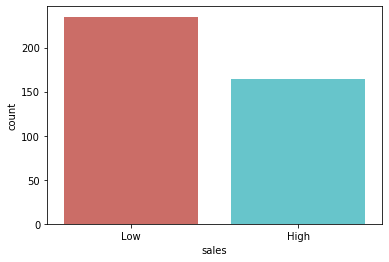

In [16]:
sns.countplot(data["sales"], palette="hls")

In [17]:
# Counts for "Low" sales is high compared to "High" counts

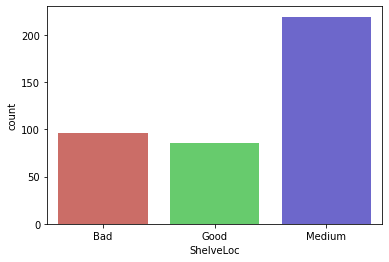

In [18]:
sns.countplot(data["ShelveLoc"], palette="hls")

In [19]:
# There are more "Medium" quality shleves in many locations compared to "Good" and "Bad" category shelves

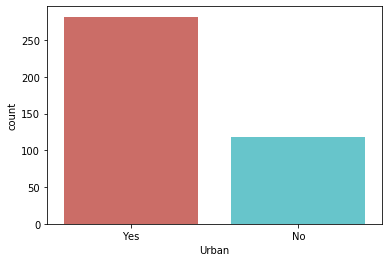

In [20]:
sns.countplot(data["Urban"], palette="hls")

In [21]:
# Most of the stores are in "Urban" locations comapred to "Non-urban"

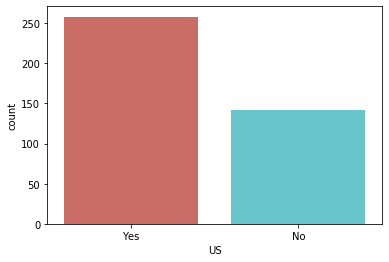

In [22]:
sns.countplot(data["US"], palette="hls")

In [23]:
# Most of the stores are located in "US" and few others in other countries

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6a8651788>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6a8656748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6a8648d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6a8656f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6a865af08>],
 'means': []}

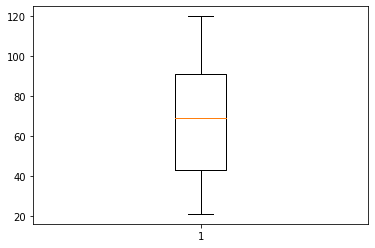

In [24]:
plt.boxplot(data["Income"])

In [25]:
# Income of the community ranges from 20 to 120 thousands with mean income of around 68 thoudands

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6a86bb748>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6a86bbfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6a86b7c48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6a86c1f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6a86c4e08>],
 'means': []}

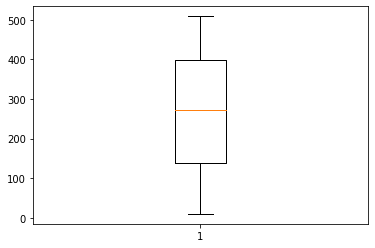

In [26]:
plt.boxplot(data["Population"])

In [27]:
# Population of the region ranges from 10 to 509 thousands with mean population of around 260 thousands

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6a8727548>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6a8727dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6a87229c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6a872cd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6a8730c08>],
 'means': []}

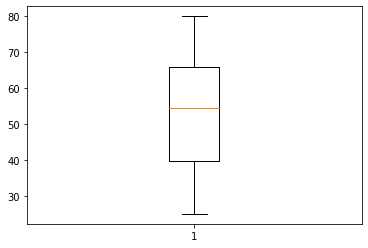

In [28]:
plt.boxplot(data["Age"])

In [29]:
# Average age of population ranges from 25 to 80, with mean age being 53 

In [30]:
# Obtaining the dummy variables for 'ShelveLoc','Urban','US'

In [31]:
data1 = pd.get_dummies(data, columns=['ShelveLoc','Urban','US'], drop_first = True)
data1.head()

,sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,High,138,73,11,276,120,42,17,0,0,1,1
1,High,111,48,16,260,83,65,10,1,0,1,1
2,High,113,35,10,269,80,59,12,0,1,1,1
3,Low,117,100,4,466,97,55,14,0,1,1,1
4,Low,141,64,3,340,128,38,13,0,0,1,0


In [32]:
# Checking for NA values in the dataset

In [33]:
data1.isna().sum()

sales               1
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
dtype: int64

In [34]:
# There is one NA value in the dataset

In [35]:
data1 = data1.dropna()               # Removing the NA value

In [36]:
data1.shape

(399, 12)

In [37]:
# Divivng the data into X and Y i.e. predictors and target

In [38]:
X = data1.iloc[:,1:]
Y = data1.iloc[:,0]

In [39]:
# Splitting the data into training and testing dataset

In [40]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)

## Decision tree model

In [108]:
# Building the Decision tree model with "entropy" as criterion

In [109]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [110]:
model = DecisionTreeClassifier(criterion="entropy")

In [111]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [112]:
# Predicting the target values using the model

In [113]:
y_pred = model.predict(x_test)
y_pred

array(['High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low'],
      dtype=object)

In [114]:
# Value counts of predicted values

In [115]:
pd.Series(y_pred).value_counts()

Low     47
High    33
dtype: int64

In [116]:
# Buliding confusion matrix

In [117]:
confusion_matrix(y_pred, y_test)

array([[24,  9],
       [14, 33]], dtype=int64)

In [118]:
pd.crosstab(y_pred, y_test)              # Cross tabulation can also be used

sales,Low,High
row_0,,
High,9,24
Low,33,14


In [119]:
# Accuracy of the model

In [120]:
Accuracy_entropy = accuracy_score(y_pred,y_test)
Accuracy_entropy

0.7125

In [121]:
# Using the Decision tree model again but using the "gini" as criterion

In [122]:
model1 = DecisionTreeClassifier(criterion="gini")

In [123]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [124]:
# Predicting the target values using the model

In [125]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['High', 'High', 'Low', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low'],
      dtype=object)

In [126]:
# Value counts of predicted values

In [127]:
pd.Series(y_pred1).value_counts()

Low     52
High    28
dtype: int64

In [128]:
# Buliding the confusion matrix

In [129]:
confusion_matrix(y_pred1, y_test)

array([[22,  6],
       [16, 36]], dtype=int64)

In [130]:
# Visualizing the Decision tree

[Text(500.05807086614175, 520.95, 'X[7] <= 0.5\ngini = 0.478\nsamples = 319\nvalue = [126, 193]'),
 Text(242.2027559055118, 475.65000000000003, 'X[4] <= 92.5\ngini = 0.418\nsamples = 252\nvalue = [75, 177]'),
 Text(98.85826771653544, 430.35, 'X[1] <= 83.5\ngini = 0.418\nsamples = 37\nvalue = [26, 11]'),
 Text(52.724409448818896, 385.05, 'X[8] <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(26.362204724409448, 339.75, 'X[4] <= 71.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(13.181102362204724, 294.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(39.54330708661417, 294.45, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(79.08661417322834, 339.75, 'X[1] <= 70.0\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(65.90551181102362, 294.45, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(92.26771653543307, 294.45, 'X[3] <= 177.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(79.08661417322834, 249.14999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')

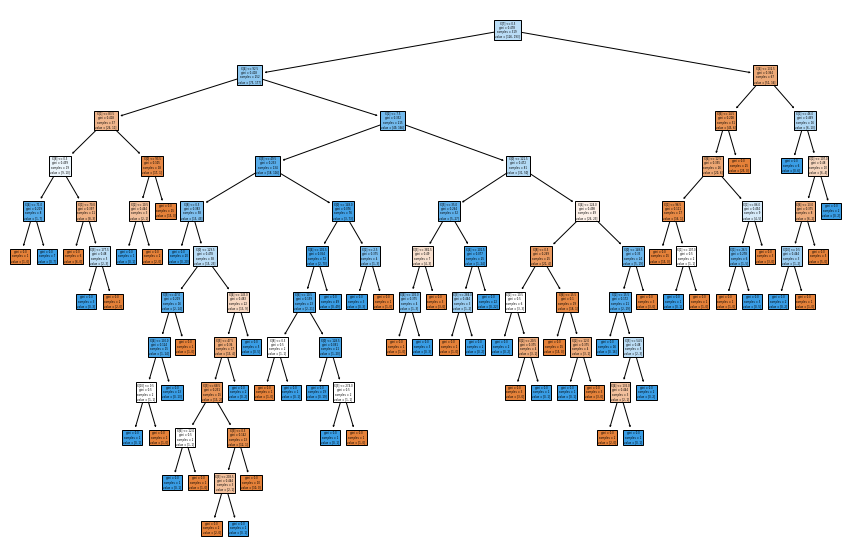

In [131]:
plt.figure(figsize=(15,10))
tree.plot_tree(model1, filled=True)

In [132]:
# Accuracy of the model

In [133]:
Accuracy_gini = accuracy_score(y_pred1,y_test)
Accuracy_gini

0.725

In [134]:
# Checking the accuracy of the model with different max_depth values from 3 to 10 

In [135]:
# List of values to try for max_depth:
max_depth_range = list(range(3, 10))                   # List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)

In [136]:
accuracy

[0.675, 0.6625, 0.7125, 0.6875, 0.725, 0.725, 0.75]

In [137]:
# The maximum accuracy can be obtained with max_depth as 7

In [138]:
# Changing the max_depth to 7 and building the model

In [139]:
model2 = DecisionTreeClassifier(criterion="gini", max_depth=7)

In [140]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [141]:
# Predicting the target value using the model

In [142]:
y_pred2= model2.predict(x_test)
y_pred2

array(['High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High'],
      dtype=object)

In [143]:
# Confusion matrix

In [144]:
confusion_matrix(y_pred2,y_test)

array([[26,  6],
       [12, 36]], dtype=int64)

In [145]:
# Visualizing the Decision tree

[Text(498.234375, 509.625, 'X[7] <= 0.5\ngini = 0.478\nsamples = 319\nvalue = [126, 193]'),
 Text(240.46875, 441.675, 'X[4] <= 92.5\ngini = 0.418\nsamples = 252\nvalue = [75, 177]'),
 Text(101.25, 373.725, 'X[1] <= 83.5\ngini = 0.418\nsamples = 37\nvalue = [26, 11]'),
 Text(54.0, 305.775, 'X[8] <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(27.0, 237.825, 'X[4] <= 71.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(13.5, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(40.5, 169.875, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(81.0, 237.825, 'X[1] <= 70.0\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(67.5, 169.875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(94.5, 169.875, 'X[3] <= 177.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(81.0, 101.92500000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(108.0, 101.92500000000001, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(148.5, 305.775, 'X[0] <= 93.5\ngini = 0.105\nsample

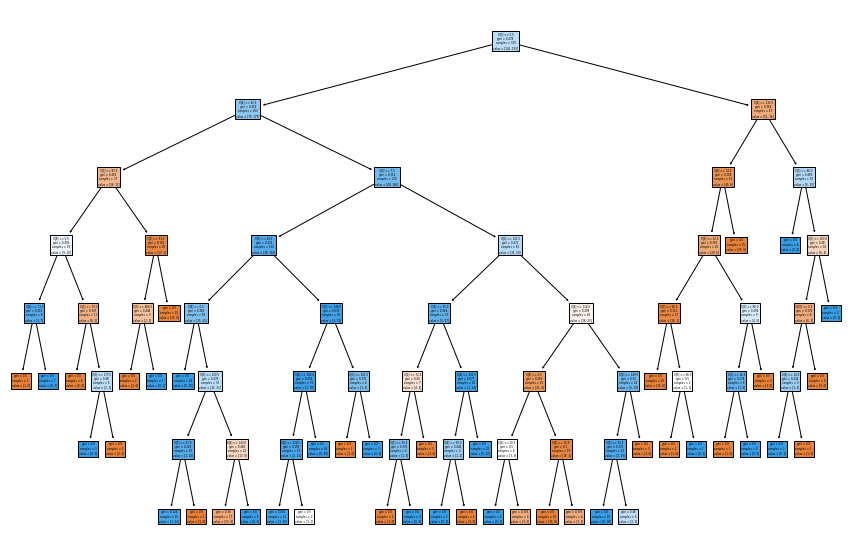

In [146]:
plt.figure(figsize=(15,10))
tree.plot_tree(model2, filled=True)

In [147]:
# Accuracy 

In [148]:
Accuracy_depth =accuracy_score(y_pred2,y_test)
Accuracy_depth

0.775

In [149]:
# Improving the accuracy of the model using "bagging" and "boosting" techniques

In [150]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Bagging

In [151]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0, n_estimators=20)

In [152]:
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [153]:
Accuracy_bag =bg.score(x_test, y_test)
Accuracy_bag

0.825

In [154]:
# Bagging technique has increased the accuracy of the model to 83.75% from 77.5%

## Boosting

In [155]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=20,learning_rate=1)

In [156]:
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=20)

In [157]:
Accuracy_boost =ada.score(x_test, y_test)
Accuracy_boost

0.725

In [158]:
# Boosting technique hasn't increased the accuracy of the model much

In [159]:
# Tabulating all the results

In [160]:
accuracies = {"Method":pd.Series(["Decisiontree_entropy","Decisiontree_gini","Decisiontree_depth","Bagging","Boosting"]),"Accuracy_values":(Accuracy_entropy,Accuracy_gini,Accuracy_depth,Accuracy_bag,Accuracy_boost)}

In [161]:
table_accuracies = pd.DataFrame(accuracies)
table_accuracies

,Method,Accuracy_values
0,Decisiontree_entropy,0.7125
1,Decisiontree_gini,0.7250
2,Decisiontree_depth,0.7750
3,Bagging,0.8250
4,Boosting,0.7250


## Observations

In [162]:
# The DecisionTree model with "gini" criterion and with max_depth of 7 has given the high accuracy of 77.5 % 
# Bagging(Bootstrapping) technique has increased the accuracy of the model to 82.5 % which is the highest of all